# <span style="color:blue"><center>Support Vector Machine</center></span>

In support vector machines, we are given a set of datapoints $(x_1, y_1), \ldots, (x_n, y_n)$ and we want to find a weight vector $w \in \mathbb{R}^d$ that solves the following optimization problem:

$$ \min_{w \in \mathbb{R}^d} \| w \|^2 + C \sum_{i=1}^n \xi_i $$
$$ \text{s.t. } y_i \langle w, x_i \rangle \geq 1 - \xi_i \text{ for all } i=1,\ldots, n$$

It is basically a perceptron where the margin is maximized.

*Examples 1 and 2 are taken from edx: 'DSE220x : Machine Learning Fundamentals'.*

In [61]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


In [64]:
def fit_SVM_classifier(train_data, train_labels, C_value=1.0):
    clf = svm.LinearSVC(C=C_value, loss='hinge', max_iter = 100000)
    clf.fit(train_data,train_labels)
    ## Get predictions on training data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return train_error, test_error

In [66]:
def cross_validation_error(x,y,C_value,k):
    n = len(y)
    ## Randomly shuffle indices
    indices = np.random.permutation(n)
    
    ## Initialize error
    err = 0.0
    
    ## Iterate over partitions
    for i in range(k):
        ## Partition indices
        test_indices = indices[int(i*(n/k)):int((i+1)*(n/k) - 1)]
        train_indices = np.setdiff1d(indices, test_indices)
        
        ## Train classifier with parameter c
        clf = svm.LinearSVC(C=C_value, loss='hinge', max_iter = 1000000)
        clf.fit(x[train_indices], y[train_indices])
        
        ## Get predictions on test partition
        preds = clf.predict(x[test_indices])
        
        ## Compute error
        err += float(np.sum((preds > 0.0) != (y[test_indices] > 0.0)))/len(test_indices)
        
    return err/k

In [67]:
def choose_parameter(x,y,k):
    cvals = [0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]
    
    all_errors = list()

    for some_c in cvals:
        error = cross_validation_error(x, y, some_c, k)
        all_errors.append(error)
    
    mindx = np.argmin(all_errors)
    
    min_cross_error = all_errors[mindx]
    best_c_value = cvals[mindx]
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.plot(np.array(cvals), all_errors, color='lawngreen', marker='*', label = 'Cross-validation error')
    ax1.set_xscale('log')
    plt.legend(loc="best")
    ax1.set_xlabel('C value')
    ax1.set_ylabel('Error')
    plt.grid()
    plt.show()
    
    return best_c_value, min_cross_error

In [62]:
def plot_classification_map(clf, data, color_at, marker_at, label_names):
    # To plot a 2-D map of the data separated by linear boundaries
    differ_labels = len(np.unique( data[:,2] ))
    x_range = np.linspace( np.min(data[:,0]), np.max(data[:, 0]), 1000 )

    plt.figure()
    x1_range = np.arange( np.min(data[:,0])-1, np.max(data[:, 0])+1 , 0.05 )
    x2_range = np.arange( np.min(data[:,1])-1, np.max(data[:, 1])+1 , 0.05 )
    X1_space, X2_space  = np.meshgrid( x1_range, x2_range )

    grid = np.c_[X1_space.ravel(), X2_space.ravel()]


    Z = np.array([clf.predict( np.array([[point[0]],[point[1]]]).reshape(-1,1).T ) for point in grid])
    Z = Z.reshape(X1_space.shape)
    plt.pcolormesh(X1_space, X2_space, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=1+np.max(data[:,2]))

    for each_class in range(differ_labels):
        class_1_points = data[ data[:,2]== each_class , :] 
        plt.scatter( class_1_points[:, 0], class_1_points[:, 1], c=color_at[each_class], marker=marker_at[each_class], label='{}'.format(label_names[each_class]))

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='best')
    plt.show()

## <span style="color:yellow"> ----------------------------------------------------------------------------------</span>
## <span style="color:red">Ex.1 - Text Classification </span>


### Preprocessing the data
The data set consists of 3000 sentences, each labeled '1' (if it came from a positive review) or '0' (if it came from a negative review). Build a model that classifies new reviews as either positive or negative. (1) Remove punctuation and numbers, (2) Transform all words to lower-case, (3) Remove stop words (common words that won't give any information like articles, pronouns, prepositions, etc), (4) Convert the sentences into vectors, using a bag-of-words representation with a vocabulary of 4500 words.


In [63]:
## Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
## Remove leading and trailing white space
content = [x.strip() for x in content]
## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1
## Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
## Remove leading and trailing white space
content = [x.strip() for x in content]
## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1
## full_remove takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x
## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x, digits) for x in sentences]
## Remove punctuation
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]
## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]
## Define our stop words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])
## Remove stop words
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]
## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4500)
data_features = vectorizer.fit_transform(sents_processed)
## Append '1' to the end of each vector.
data_mat = data_features.toarray()
## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))
train_data = data_mat[train_inds,]
train_labels = y[train_inds]
test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4500)
test data:  (500, 4500)


Error rate for C = 0.01: train 0.215 test 0.250
Error rate for C = 0.10: train 0.074 test 0.174
Error rate for C = 1.00: train 0.011 test 0.152
Error rate for C = 10.00: train 0.002 test 0.188
Error rate for C = 100.00: train 0.001 test 0.194
Error rate for C = 1000.00: train 0.000 test 0.214
Error rate for C = 10000.00: train 0.000 test 0.214


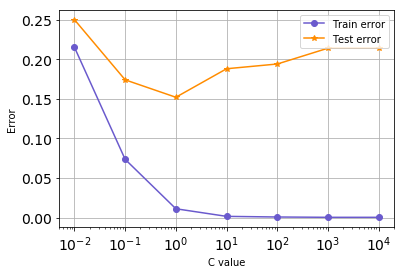

In [65]:
cvals = [0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]

train_all_errors = list()
test_all_errors = list()

for c in cvals:
    train_error, test_error = fit_SVM_classifier(train_data, train_labels,c)
    print ("Error rate for C = %0.2f: train %0.3f test %0.3f" % (c, train_error, test_error))
    train_all_errors.append(train_error)
    test_all_errors.append(test_error)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(np.array(cvals), train_all_errors, color='slateblue', marker='o', label = 'Train error')
ax1.plot(np.array(cvals), test_all_errors, color='darkorange', marker='*', label = 'Test error')
ax1.set_xscale('log')
plt.legend(loc="best")
ax1.set_xlabel('C value')
ax1.set_ylabel('Error')
plt.grid()
plt.show()

### Evaluating C by k-fold cross-validation

An appropriate value for $C$ could be estimated by using just the training set through the *k-fold cross validation*. It consists simply in dividing the training set into $k$ equal-sized subsets and for every $k$, train the classifier with all the groups except one that acts as the test set. Finally average the $k$ error estimates obtained. Try for multiple values of $C$ and choose the one that yields the lowest cross-validation error.


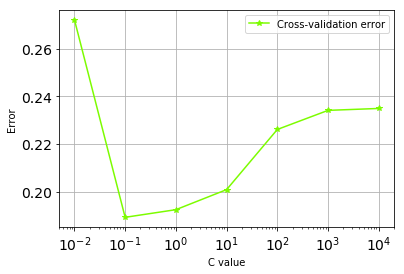

Choice of C:  0.1
Cross-validation error estimate:  0.1891566265060241
Test error:  0.174


In [68]:
c, err = choose_parameter(train_data, train_labels, 10)
print("Choice of C: ", c)
print("Cross-validation error estimate: ", err)
## Train it and test it
clf = svm.LinearSVC(C=c, loss='hinge', max_iter = 100000)
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)
error = float(np.sum((preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
print("Test error: ", error)

### Notice that many of the coefficients in the output classifier are zero, the rest are the support vectors:

In [69]:
(clf.coef_.shape)

(1, 4500)

In [70]:
np.sum(clf.coef_ == 0) 

1241

## <span style="color:yellow"> ----------------------------------------------------------------------------------</span>
## <span style="color:red">Ex.2 - Multiclass Support Vector Machine </span>

Each label has a line boundary associated, the optimization problem is the same but now solves with more linear restrictions.

/home/cristian/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cristian/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cristian/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cristian/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


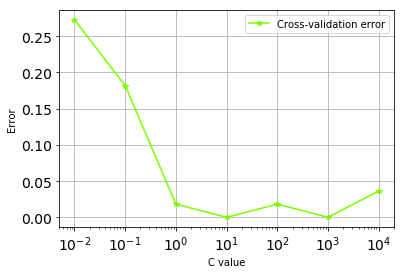

In [71]:
data = np.loadtxt('data_4.txt')

train_data = data[:,0:2]
train_labels = data[:,2]
c, err = choose_parameter(train_data, train_labels, 5)

In [72]:
clf = svm.LinearSVC(C=c, loss='hinge', max_iter = 100000)
clf.fit(train_data, train_labels)


LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

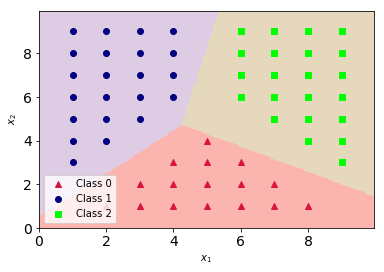

In [73]:
color_at = ['crimson', 'navy', 'lime', 'black']
marker_at = ['^', 'o', 's', 'd']
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
plot_classification_map(clf, data, color_at, marker_at, label_names)